# O Modelo Normal

Creation on August 23 2021.

Last modification on October 13 2021.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

github: 

Importar bibliotecas

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.integrate import quad

Definir o estilo dos _plots_.

In [2]:
style.use('seaborn')

Criar a função normal.

In [3]:
def normal_function(x, mu, variance):
    numerator = np.exp((((x - mu) ** 2)*(-1)) / (2*variance))
    denominator = np.sqrt(2*np.pi*variance)
    return numerator / denominator

Criar a função normal acumulada.

In [4]:
def cumulative_distribution_function(inferior_limit, upper_limit, mu, variance):
    value =  quad(normal_function, 
                inferior_limit, 
                upper_limit, 
                (mu,variance))
    return value[0]

Definir a média e a variância. 

Obs: Nos exemplos serão utilizados o modelo normal padrão com média = 0 e variância = 1.

In [5]:
# mean and variance
mu = 0
variance = 1

Definir os eixos x e y.

No eixo x: utilizamos a função _arange_ do numpy para criar uma lista de valores uniformemente separada.

No eixo y: aplicamos a função _normal_function_ para cada valor do eixo x e assim obtemos a lista de valores do eixo y.

In [6]:
# x and y coordinate values
x_values = list(np.around(np.arange(mu - 5, mu + 5.01, 0.01), 2))
y_values = list(map(lambda value: normal_function(value, mu, variance), x_values))

Valor da coordenada (x,y) para o _plot_ de uma linha vertical.

In [7]:
# (x,y) coordinate value for vertical line plot
x_value_mu = x_values[int(len(x_values) / 2)]
y_value_mu = normal_function(x_value_mu, mu, variance)

### Unicaudal


(1) Probabilidade de Z menor ou igual a 1;


(2) Probabilidade de Z maior ou igual a -2.5.

Definir o limite inferior e o limite superior de Z.

In [26]:
# Z inferior and upper values for example 01.
inferior_limit_01 = np.NINF
upper_limit_01 = 1

# Z inferior and upper values for example 02.
inferior_limit_02 = -2.5
upper_limit_02 = np.inf

Probabilidade normal da área do limite inferior até o limite superior

In [40]:
# Normal probability for example 01.
normal_probability_01 = np.around(
    cumulative_distribution_function(inferior_limit_01, 
                                         upper_limit_01, 
                                         mu, variance), 4)
normal_probability_01 = np.around(normal_probability_01, 2)

# Normal probability for example 02.
normal_probability_02 = np.around(
    cumulative_distribution_function(inferior_limit_02, 
                                         upper_limit_02, 
                                         mu, variance), 4)
normal_probability_02 = np.around(normal_probability_02, 2)

Definir a area de preenchimento.

In [41]:
'''Creation of the lists of x and y coordinates for the probability area 
for example 01.'''
x_fill_01 = x_values[0:int(x_values.index(upper_limit_01))]
y_fill_01 = y_values[0:int(x_values.index(upper_limit_01))]
'''Creation of the lists of x and y coordinates for the probability area 
for example 02.'''
x_fill_02 = x_values[int(x_values.index(inferior_limit_02)): len(x_values) - 1]
y_fill_02 = y_values[int(x_values.index(inferior_limit_02)): len(x_values) - 1]

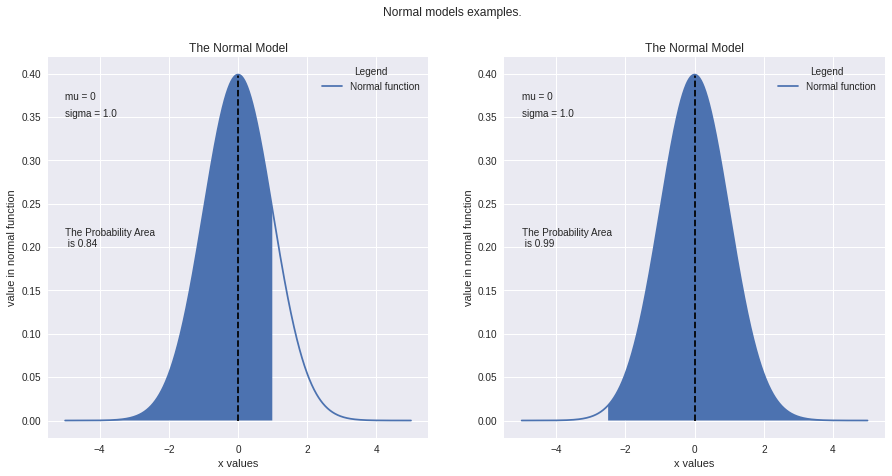

In [42]:
figure = plt.figure(figsize=(15,7))
figure.suptitle('Normal models examples.')
plots = figure.subplots(nrows=1, ncols=2)

plots[0].plot(x_values, y_values, label='Normal function')
plots[0].vlines(x_value_mu, 0, y_value_mu, ls='dashed', color='black')
plots[0].set_title('The Normal Model')
plots[0].set_xlabel('x values')
plots[0].set_ylabel('value in normal function')
plots[0].text(-5, 0.37, 'mu = {}'.format(mu))
plots[0].text(-5, 0.35, 'sigma = {}'.format(np.sqrt(variance)))
plots[0].text(-5, 0.20, 'The Probability Area\n is {}'.format(normal_probability_01))
plots[0].fill_between(x_fill_01, y_fill_01)
plots[0].legend(title='Legend')

plots[1].plot(x_values, y_values, label='Normal function')
plots[1].vlines(x_value_mu, 0, y_value_mu, ls='dashed', color='black')
plots[1].set_title('The Normal Model')
plots[1].set_xlabel('x values')
plots[1].set_ylabel('value in normal function')
plots[1].text(-5, 0.37, 'mu = {}'.format(mu))
plots[1].text(-5, 0.35, 'sigma = {}'.format(np.sqrt(variance)))
plots[1].text(-5, 0.20, 'The Probability Area\n is {}'.format(normal_probability_02))
plots[1].fill_between(x_fill_02, y_fill_02)
plots[1].legend(title='Legend')

### Bicaudal